# Miniproject 1 #

In [46]:
# duh
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal # For signal generation + convolution
from scipy.stats import gamma # For Gamma function

## 1. Generation of the Stimulus Signal ##

We imaging to show the stimuli to the subject as described in the assignment paper. We make the assumption that the neurons have a linear response to the stimuli, such that the neural response to showing a series of faces is a square wave. 

Thus, the signal created below is assumed to correspond to the actual degree of activation of the neurons. 

In a later version of the notebook, the signal should be amended to account for controls?

In [39]:
Ts = 8 # sampling frequency [Hz]
t = np.arange(0, 100, 1/Ts)
presentation_duration = 2 # [s]
episode_duration = 10 # [s]
neur = 0.5*(scipy.signal.square(2*np.pi*(1/episode_duration)*t, presentation_duration/episode_duration)+1)

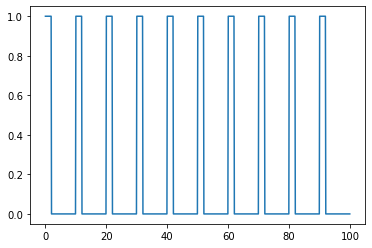

In [40]:
plt.plot(t, neur)

## 2. Generation of the HRF Response Function ##

We now consider the response of the blood-oxygen level (BOLD) signal.

Consider an impulse (ie Dirac impulse) activation of one neuron; as seen in class, then blood-oxygen level varies accordingly. This response of the BOLD signal forms the impulse response of the LTI system whose input is the abstracted neural activation (ie on/off) and whose output is the BOLD signal. This is called the hemoglobin (?) response function HRF. 

There is an initial phase of overcompensation or overshoot where the oxygen level is raised far above neutral level, then a second phase of undershoot where the oxygen level temporarily drops. These two phases are modelled by the shape of a gamma probability distribution. 

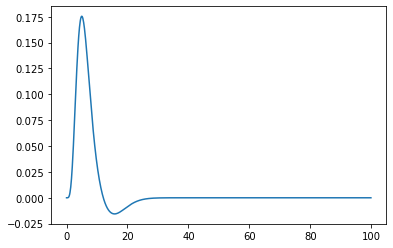

In [54]:
A = 1 # temporary (?)

alpha1 = 6
alpha2 = 16
beta1 = 1
beta2 = 1
c = 1/6

h = A*gamma.pdf(t, alpha1, scale=1/beta1)- c*gamma.pdf(t, alpha2, scale=1/beta2)

plt.plot(t, h)

Note: per the documentation for the Gamma function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html), gamma.pdf(t, a, scale=1/b) is equivalent to $\frac{b^a x^{a-1}e^{b t}}{\Gamma(a)}$

Now we can obtain the measured BOLD response by convolving the simulated neural activation signal with the HRF: (mode='same' gives an output of same size as the first argument)

In [69]:
bold = scipy.signal.convolve(neur, h, mode='same')

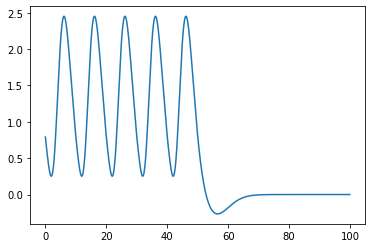

In [70]:
plt.plot(t, bold)

## 3. Observing the Effects of the alpha Parameters

/var/folders/bj/jt74ftb16rjc33clq00_ylx80000gn/T/ipykernel_39985/976608538.py:7: RuntimeWarning: invalid value encountered in subtract
  axs[i,j].plot(t, gamma.pdf(t, alpha1s[i], scale=1/beta1)- c*gamma.pdf(t, alpha2s[j], scale=1/beta2))


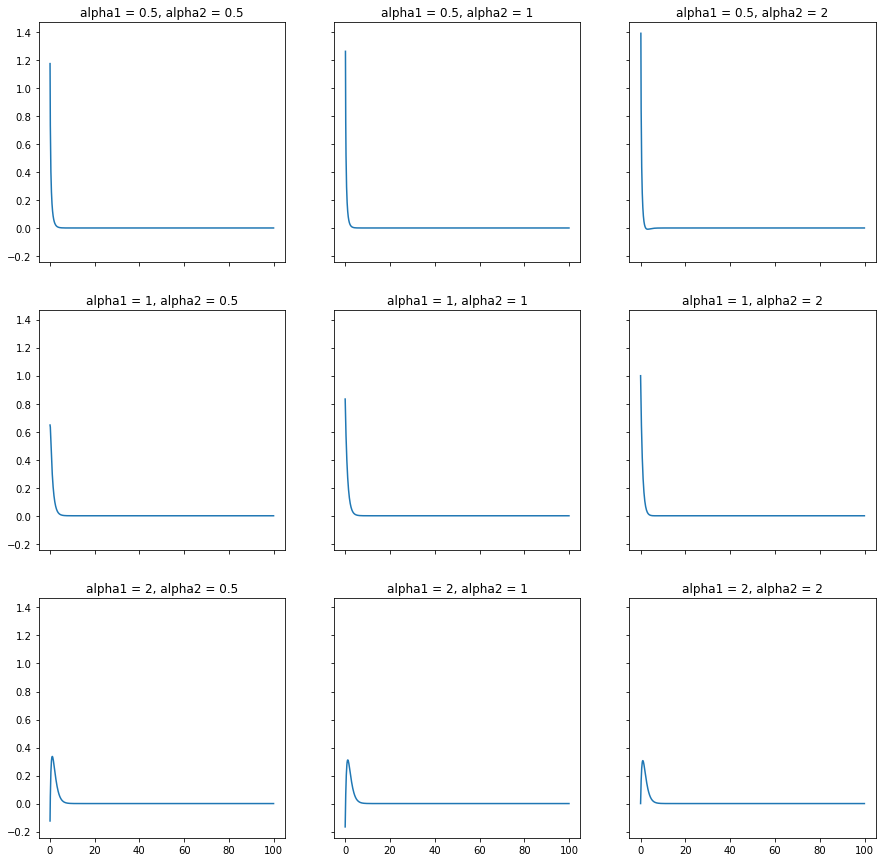

In [78]:
alpha1s = [0.5, 1, 2]*alpha1
alpha2s = [0.5, 1, 2]*alpha2

fig, axs = plt.subplots(3,3, sharex=True, sharey=True, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        axs[i,j].plot(t, gamma.pdf(t, alpha1s[i], scale=1/beta1)- c*gamma.pdf(t, alpha2s[j], scale=1/beta2))
        axs[i,j].set_title(f"alpha1 = {alpha1s[i]}, alpha2 = {alpha2s[j]}")

## 4. Adding Gaussian Noise ##

In [74]:
sigma = 0.5 # std dev of the noise added
bold_noisy = bold + np.random.normal(0, sigma, t.shape)

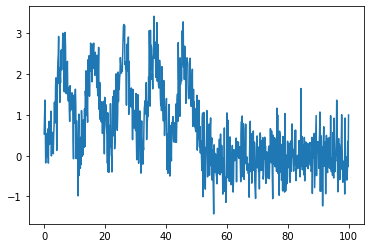

In [75]:
plt.plot(t, bold_noisy)